In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits



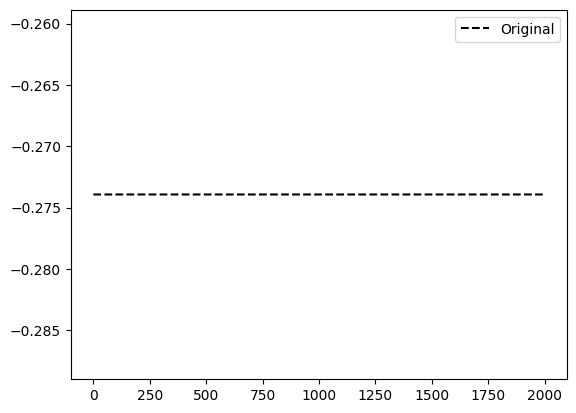

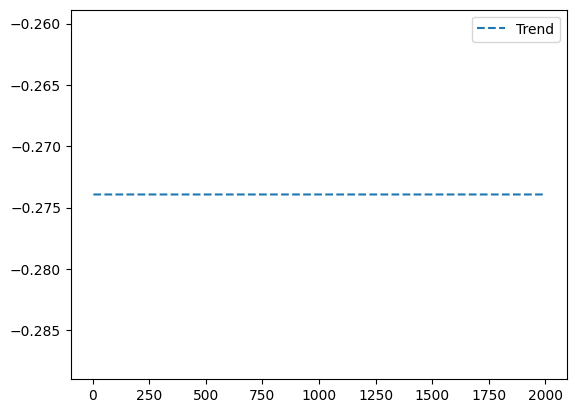

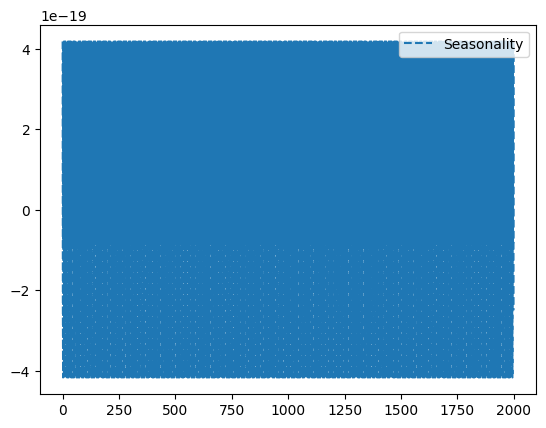

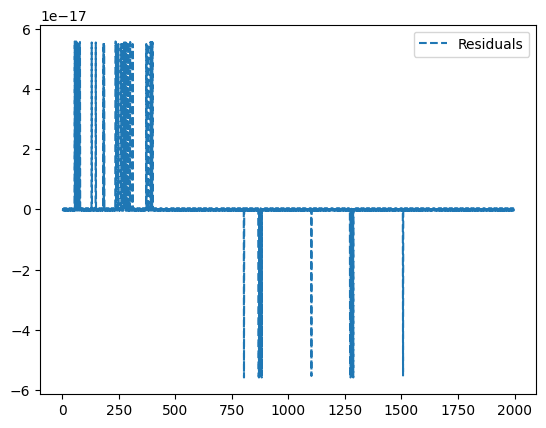

In [88]:

hdul = fits.open('kplr010287248-20160128150956_dvt.fits')
#hdul.info()
data = hdul[1].data
#print(len(data.field(0)))
#plt.plot(data.field(0)[0:20000],data.field(6)[0:20000])
from statsmodels.tsa.seasonal import seasonal_decompose
import math
test = [data.field(0)[0:20000],data.field(6)[0:20000]]
test = np.empty([2000,1])
i=0
j=0
while(i < 2000):
    while math.isnan(data.field(6)[j]): j=j+1
    test[i] = data.field(6)[j]
    i=i+1

result = seasonal_decompose(x=test, model='additive',period=6)
plt.plot(result.observed,'k',linestyle='dashed',label='Original')
plt.legend(loc='upper right')
plt.show()
plt.plot(result.trend,linestyle='dashed', label='Trend')
plt.legend(loc='upper right')
plt.show()
plt.plot(result.seasonal,linestyle='dashed', label='Seasonality')
plt.legend(loc='upper right')
plt.show()
plt.plot(result.resid,linestyle='dashed',label='Residuals')
plt.legend(loc='upper right')
plt.show()
hdul.close()